In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
neldermead = pd.read_pickle(".cache_3/nelder-mead-fdf.pkl")
bayesian1 = pd.read_pickle(".cache_3/bayesian2-mae.pkl")
bayesian2 = pd.read_pickle(".cache_3/bayesian2-mse.pkl")
bayesian3 = pd.read_pickle(".cache_3/bayesian2-log.pkl")

models = ["polished-donkey-996", "polar-lake-997", "still-deluge-998"]
rl = pd.concat([pd.read_pickle(f".cache_3/{model}.pkl") for model in models])

In [3]:
evaluation = pd.concat([neldermead,bayesian1,bayesian2,bayesian3,rl])

In [4]:
# Compute MAE
evaluation["delta_mu_x"] = np.abs(evaluation["mup_x"] - evaluation["mu_x"])
evaluation["delta_mu_y"] = np.abs(evaluation["mup_y"] - evaluation["mu_y"])
evaluation["delta_sigma_x"] = np.abs(evaluation["sigmap_x"] - evaluation["sigma_x"])
evaluation["delta_sigma_y"] = np.abs(evaluation["sigmap_y"] - evaluation["sigma_y"])
evaluation["mae"] = (evaluation["delta_mu_x"] + evaluation["delta_mu_y"] + evaluation["delta_sigma_x"] + evaluation["delta_sigma_y"]) / 4

In [5]:
leq30 = evaluation["step"] <= 30
opt = evaluation["model"].isin(["nelder-mead","bayesian2-mae","bayesian2-mse","bayesian2-log"])

evaluation30 = evaluation[leq30 | opt]

In [6]:
finals = evaluation30.groupby(["model","problem"]).apply(lambda x: x.loc[x["step"].idxmax()])
finals = finals.drop(["model","problem"], axis=1).reset_index()

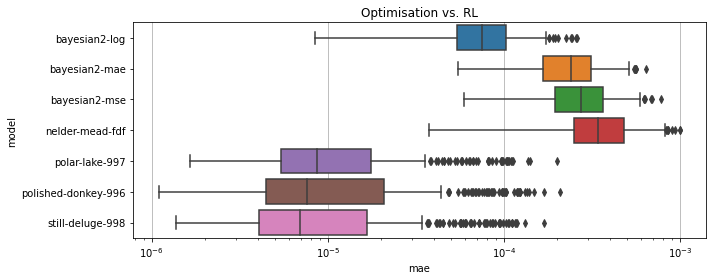

In [11]:
plt.figure(figsize=(10,4))
plt.title("Optimisation vs. RL")
sns.boxplot(x="mae", y="model", data=finals)
plt.xscale("log")
plt.gca().xaxis.grid()
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()

In [12]:
is_nelder = evaluation["method"] == "nelder-mead-fdf"
is_p0 = evaluation["problem"] == 0

problem_000 = evaluation[is_nelder & is_p0]

In [34]:
problem_000[["mu_x","mu_y","sigma_x","sigma_y"]]

,mu_x,mu_y,sigma_x,sigma_y
0,-0.000043,0.000392,0.000051,0.000062
1,-0.000043,0.000392,0.000051,0.000062
2,-0.000045,0.000411,0.000058,0.000066
3,-0.000045,0.000369,0.000049,0.000056
4,-0.000045,0.000401,0.000049,0.000064
...,...,...,...,...
82,0.000000,0.000001,0.000011,0.000026
83,0.000007,-0.000012,0.000011,0.000023
84,0.000007,0.000018,0.000011,0.000028
85,-0.000007,-0.000009,0.000011,0.000022


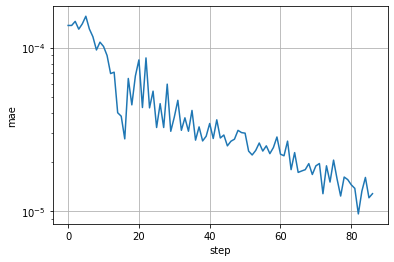

In [13]:
sns.lineplot(x="step", y="mae", data=problem_000)
plt.yscale("log")
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

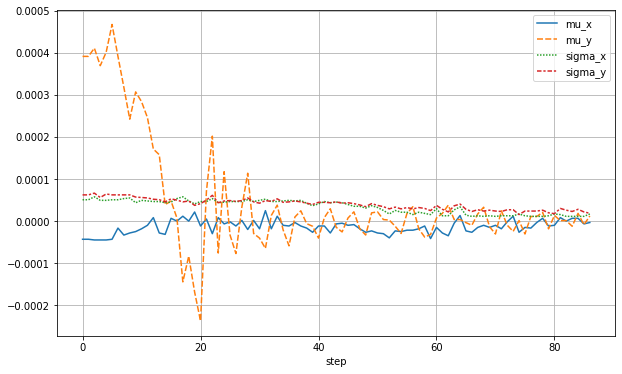

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=problem_000.set_index("step")[["mu_x","mu_y","sigma_x","sigma_y"]])
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()